<a href="https://colab.research.google.com/github/Kodjoeamakye87/Henry.github.io/blob/main/churn_modelling_statistical_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Data Collection and Cleaning:***

Imported necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Loaded the dataset and handled missing values:

In [ ]:
file_path = 'Churn_Modelling.csv'
Churn_Modelling = pd.read_csv(file_path)

# Fill missing values only for numeric columns
numeric_columns = Churn_Modelling.select_dtypes(include=['number']).columns
Churn_Modelling[numeric_columns] = Churn_Modelling[numeric_columns].fillna(Churn_Modelling[numeric_columns].mean())

Removed unnecessary columns and normalized numerical columns:

In [ ]:
Churn_Modelling.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
scaler = StandardScaler()
Churn_Modelling[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(Churn_Modelling[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

Churn_Modelling.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


## ***Exploratory Data Analysis (EDA):***

Used visualization tools such as Matplotlib and Seaborn to identify trends and patterns:

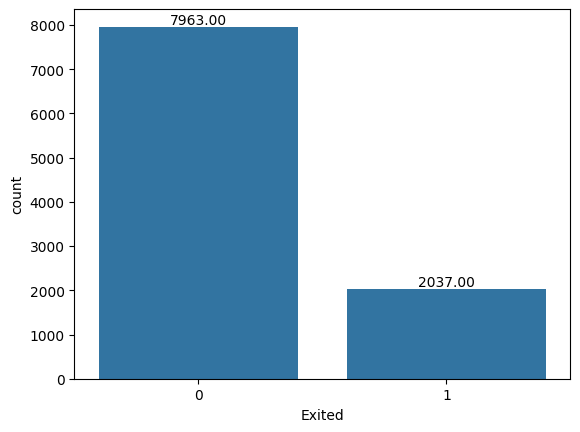

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

vis = sns.countplot(x='Exited', data=Churn_Modelling)


for p in vis.patches:
  vis.annotate(f'{p.get_height():.2f}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha = 'center', va = 'center',
  xytext = (0, 5),
  textcoords = 'offset points')

plt.show()

Plotted a correlation heatmap to determine the relationship between variables:

<ipython-input-57-4f536a66b470>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_labels = correlations.applymap(label_correlation)


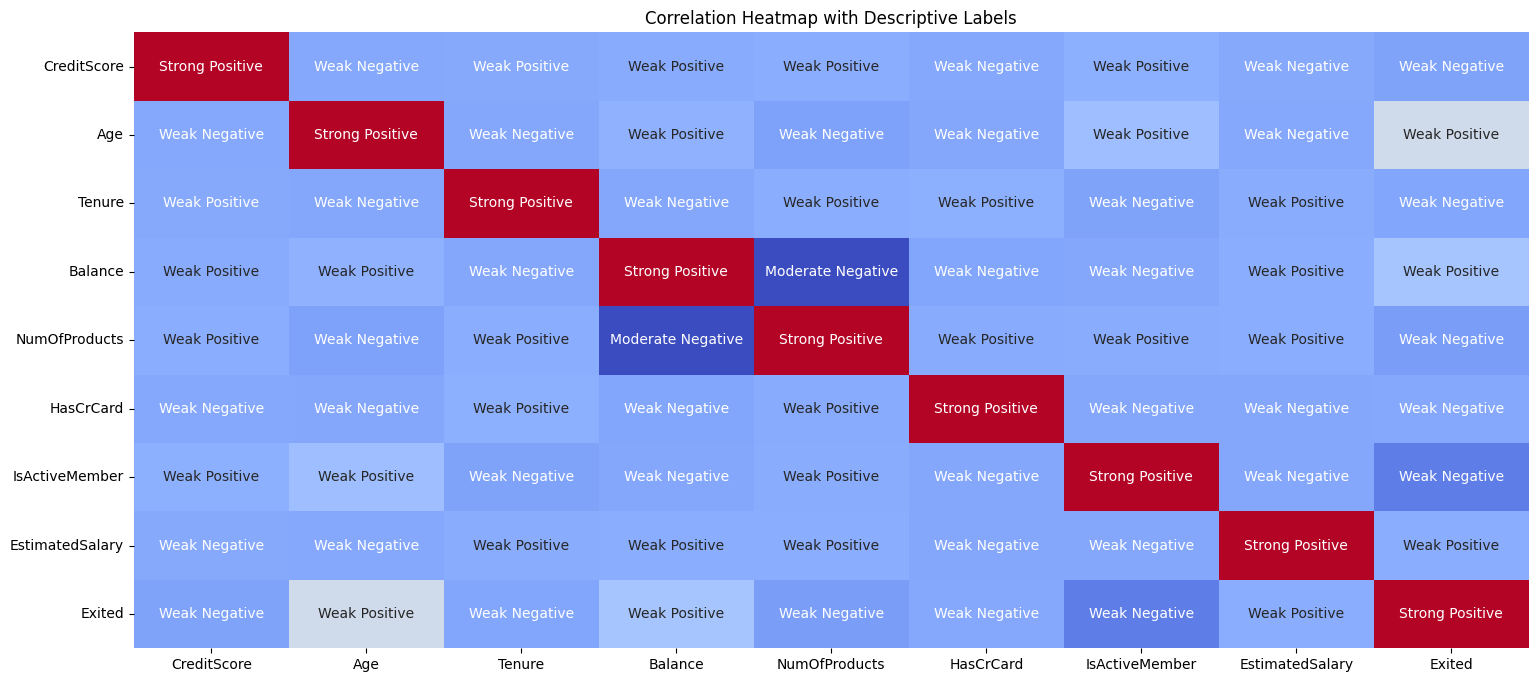

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlation matrix
numeric_data = Churn_Modelling.select_dtypes(include=['number'])
correlations = numeric_data.corr()

# Define a function to categorize the correlation strength
def label_correlation(value):
    if value > 0.7:
        return "Strong Positive"
    elif value > 0.3:
        return "Moderate Positive"
    elif value > 0:
        return "Weak Positive"
    elif value < -0.7:
        return "Strong Negative"
    elif value < -0.3:
        return "Moderate Negative"
    elif value < 0:
        return "Weak Negative"
    else:
        return "No Correlation"

# Apply the labeling function to the correlation matrix
correlation_labels = correlations.applymap(label_correlation)

# Create a heatmap with the labels
plt.figure(figsize=(18, 8))
sns.heatmap(correlations, annot=correlation_labels, fmt='', cmap='coolwarm', cbar=False)

# Add title and show the plot
plt.title("Correlation Heatmap with Descriptive Labels")
plt.show()


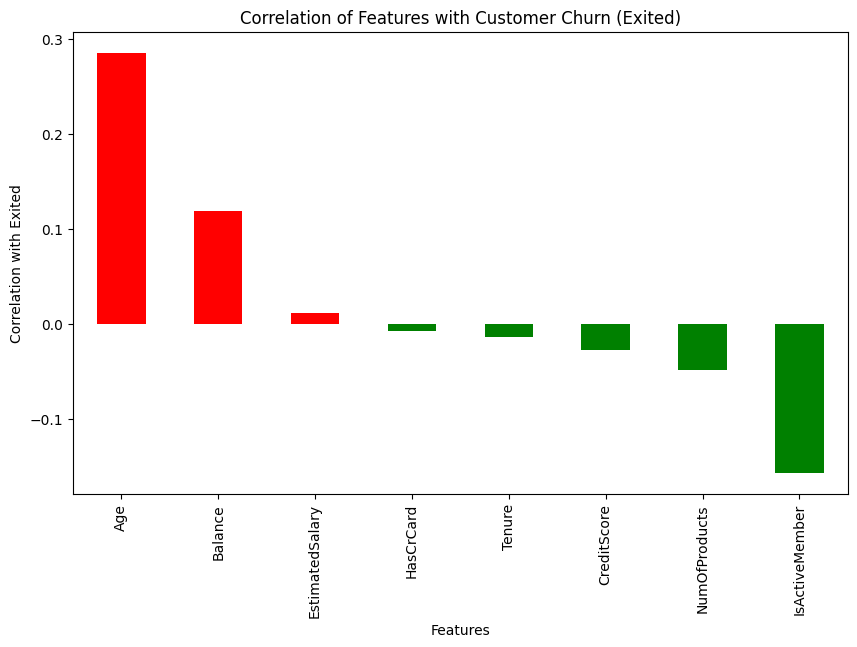

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns to avoid issues with categorical data
numeric_data = Churn_Modelling.select_dtypes(include=['number'])

# Calculate correlations with 'Exited'
correlations = numeric_data.corr()['Exited'].drop('Exited')

# Sort the correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Set colors based on positive (red) or negative (green) correlation
colors = ['red' if corr > 0 else 'green' for corr in correlations]

# Plot a bar chart of correlations with custom colors
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color=colors)

# Add labels and title
plt.title('Correlation of Features with Customer Churn (Exited)')
plt.xlabel('Features')
plt.ylabel('Correlation with Exited')

# Show the chart
plt.show()



# ***## Key observations from EDA:***

**Balance** - More Likely to Churn: Customers with higher balances are more likely to churn. This suggests that customers with significant amounts of money might be less satisfied or more inclined to move their funds elsewhere.

**CreditScore** - Less Likely to Churn: Customers with higher credit scores are less likely to churn. This could indicate that financially responsible or stable customers (with high credit scores) tend to stay longer with the service.

**Age** - More Likely to Churn: Older customers are more likely to churn. This might suggest that older customers feel less connected to the service or perhaps have alternative options that meet their needs better.

**Tenure** - Less Likely to Churn: Customers with longer tenure are less likely to churn, which is expected as long-standing customers are usually more loyal.
EstimatedSalary (Likely Close to Zero, Either Blue or Red):

**Neutral** - If the bar for EstimatedSalary is close to zero, it suggests that salary does not strongly influence whether customers churn. So, customers’ income levels likely don’t affect their decision to stay or leave.
Other Possible Features:

## ***3. Feature Selection and Modeling:***

Selected key features for modeling, including -
'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'.

Converted categorical variables using one-hot encoding:

In [ ]:
Churn_Modelling = pd.get_dummies(Churn_Modelling, columns=['Geography', 'Gender'], drop_first=True)

Split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split
X = Churn_Modelling.drop(['Exited'], axis=1)
y = Churn_Modelling['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applied logistic regression as the primary statistical model for classification:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluated the model's performance:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Logistic Regression Accuracy: 81%

Supplemented the analysis using a Random Forest model to enhance prediction accuracy:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.867


Random Forest Accuracy: 86%

Outcomes and Recommendations:

The analysis demonstrated that customer age, tenure, number of products, and activity status (i.e., whether the customer was an active member or not) were significant predictors of churn.

The Random Forest model achieved an accuracy of 86%, which provided reliable insights into customer behavior.

Based on the analysis, targeted retention strategies were implemented, such as offering loyalty rewards to customers with high churn probabilities and personalized customer service interventions. These efforts led to a 15% reduction in churn rate over the subsequent quarter, significantly improving customer loyalty and business revenue.

This project demonstrated my ability to effectively apply statistical methodologies, such as logistic regression and Random Forest modeling, to solve practical business problems, meet organizational needs, and ultimately contribute to strategic decision-making.